In [252]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation, Dropout, Average
from tensorflow.keras.models import Model
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import callbacks
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import gc
import tensorflow as tf

In [253]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [181]:
os.listdir()

['.ipynb_checkpoints', 'a.png', 'augmented', 'NumtaDB_augmentation.ipynb']

In [182]:
datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
x= io.imread('C:/Users/Asus/anaconda3/input/training-a/a00000.png')
x = x.reshape((1, ) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=16,
                         save_to_dir='augmented',
                         save_prefix='aug',
                         save_format='png'):
    i+=1
    if i>20:
        break
    

In [187]:
datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
i=0
for batch in datagen.flow_from_directory(directory='C:/Users/Asus/anaconda3/input/', 
                                         batch_size=16,
                                         target_size=(32,32),
                                         color_mode='rgb',
                                         save_to_dir='augmented',
                                         save_prefix='aug',
                                         save_format='png'):
    i+=1
    if i>30:
        break

Found 72045 images belonging to 10 classes.


In [265]:
batch_size = 16


train_datagen = ImageDataGenerator(rescale = 1./225,
                                  rotation_range=45,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=0.2)

#validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('C:/Users/Asus/anaconda3/input/',
                                                   color_mode='grayscale',
                                                   target_size=(32,32),
                                                   batch_size=batch_size)

validation_generator = train_datagen.flow_from_directory('C:/Users/Asus/anaconda3/input/',
                                                   color_mode='grayscale',
                                                   target_size=(32,32),
                                                   batch_size=batch_size)

Found 72045 images belonging to 10 classes.
Found 72045 images belonging to 10 classes.


In [266]:
def my_model(img_size=32,channels=1):
    model = Sequential()
    input_shape = (img_size,img_size,channels)
    model.add(Conv2D(32, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(Adam(lr=.0001),loss='categorical_crossentropy', metrics=['accuracy'])
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_45 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_46 (Batc (None, 16, 16, 128)     

In [267]:
model.fit_generator(train_generator,
                   steps_per_epoch=1000,
                   epochs=50,
                   validation_data=validation_generator,
                   validation_steps=800)
model.save('numtaDB_augmented_model.h5')

Epoch 1/50
1000/1000 [==============================] - 181s 180ms/step - loss: 0.2435 - accuracy: 0.9252 - val_loss: 0.1617 - val_accuracy: 0.9559
Epoch 2/50
1000/1000 [==============================] - 190s 190ms/step - loss: 0.1404 - accuracy: 0.9596 - val_loss: 0.0863 - val_accuracy: 0.9772
Epoch 3/50
1000/1000 [==============================] - 184s 184ms/step - loss: 0.1325 - accuracy: 0.9644 - val_loss: 0.1102 - val_accuracy: 0.9720
Epoch 4/50
1000/1000 [==============================] - 181s 181ms/step - loss: 0.1202 - accuracy: 0.9663 - val_loss: 0.3354 - val_accuracy: 0.9002
Epoch 5/50
1000/1000 [==============================] - 181s 181ms/step - loss: 0.1129 - accuracy: 0.9691 - val_loss: 1.0796 - val_accuracy: 0.5380
Epoch 6/50
1000/1000 [==============================] - 196s 196ms/step - loss: 0.1022 - accuracy: 0.9719 - val_loss: 0.0755 - val_accuracy: 0.9773
Epoch 7/50
1000/1000 [==============================] - 188s 188ms/step - loss: 0.1007 - accuracy: 0.9714 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 173s 173ms/step - loss: 0.0745 - accuracy: 0.9774 - val_loss: 0.2353 - val_accuracy: 0.9108
Epoch 47/50
1000/1000 [==============================] - 172s 172ms/step - loss: 0.0719 - accuracy: 0.9789 - val_loss: 0.3147 - val_accuracy: 0.8977
Epoch 48/50
 694/1000 [===================>..........] - ETA: 41s - loss: 0.0686 - accuracy: 0.9796

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 661/1000 [==================>...........] - ETA: 47s - loss: 0.0702 - accuracy: 0.9796

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [268]:
#Declaring constants
FIG_WIDTH=20 # Width of figure
HEIGHT_PER_ROW=3 # Height of each row when showing a figure which consists of multiple rows
RESIZE_DIM=32 # The images will be resized to 28x28 pixels

In [269]:

data_dir=os.path.join('..','testing-all-corrected')
paths_test_a=glob.glob(os.path.join(data_dir,'testing-a','*.png'))
paths_test_b=glob.glob(os.path.join(data_dir,'testing-b','*.png'))
paths_test_e=glob.glob(os.path.join(data_dir,'testing-e','*.png'))
paths_test_c=glob.glob(os.path.join(data_dir,'testing-c','*.png'))
paths_test_d=glob.glob(os.path.join(data_dir,'testing-d','*.png'))
paths_test_f=glob.glob(os.path.join(data_dir,'testing-f','*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.JPG'))
paths_test_auga=glob.glob(os.path.join(data_dir,'testing-auga','*.png'))
paths_test_augc=glob.glob(os.path.join(data_dir,'testing-augc','*.png'))
paths_test_all=paths_test_a+paths_test_b+paths_test_c+paths_test_d+paths_test_e+paths_test_f+paths_test_auga+paths_test_augc

In [270]:

X_test_a=get_data(paths_test_a,resize_dim=RESIZE_DIM)
X_test_b=get_data(paths_test_b,resize_dim=RESIZE_DIM)
X_test_c=get_data(paths_test_c,resize_dim=RESIZE_DIM)
X_test_d=get_data(paths_test_d,resize_dim=RESIZE_DIM)
X_test_e=get_data(paths_test_e,resize_dim=RESIZE_DIM)
X_test_f=get_data(paths_test_f,resize_dim=RESIZE_DIM)
X_test_auga=get_data(paths_test_auga,resize_dim=RESIZE_DIM)
X_test_augc=get_data(paths_test_augc,resize_dim=RESIZE_DIM)

processed 3489/3489
processed 69/69
processed 4381/4381
processed 1948/1948
processed 2970/2970
processed 495/495
processed 2168/2168
processed 2106/2106


In [271]:

X_test_all=np.concatenate((X_test_a,X_test_b,X_test_c,X_test_d,X_test_e,X_test_f,X_test_auga,X_test_augc))

In [272]:
X_test_all = X_test_all.reshape(X_test_all.shape[0],32, 32,1).astype('float32')

In [273]:

X_test_all=X_test_all/255

In [274]:
model = load_model('numtaDB_augmented_model.h5')
predictions_prob=model.predict(X_test_all)

In [275]:
n_sample=200
np.random.seed(42)
ind=np.random.randint(0,len(X_test_all), size=n_sample)

<ipython-input-205-3c25ed11f35b>:69: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(j,n_per_row,i+1)


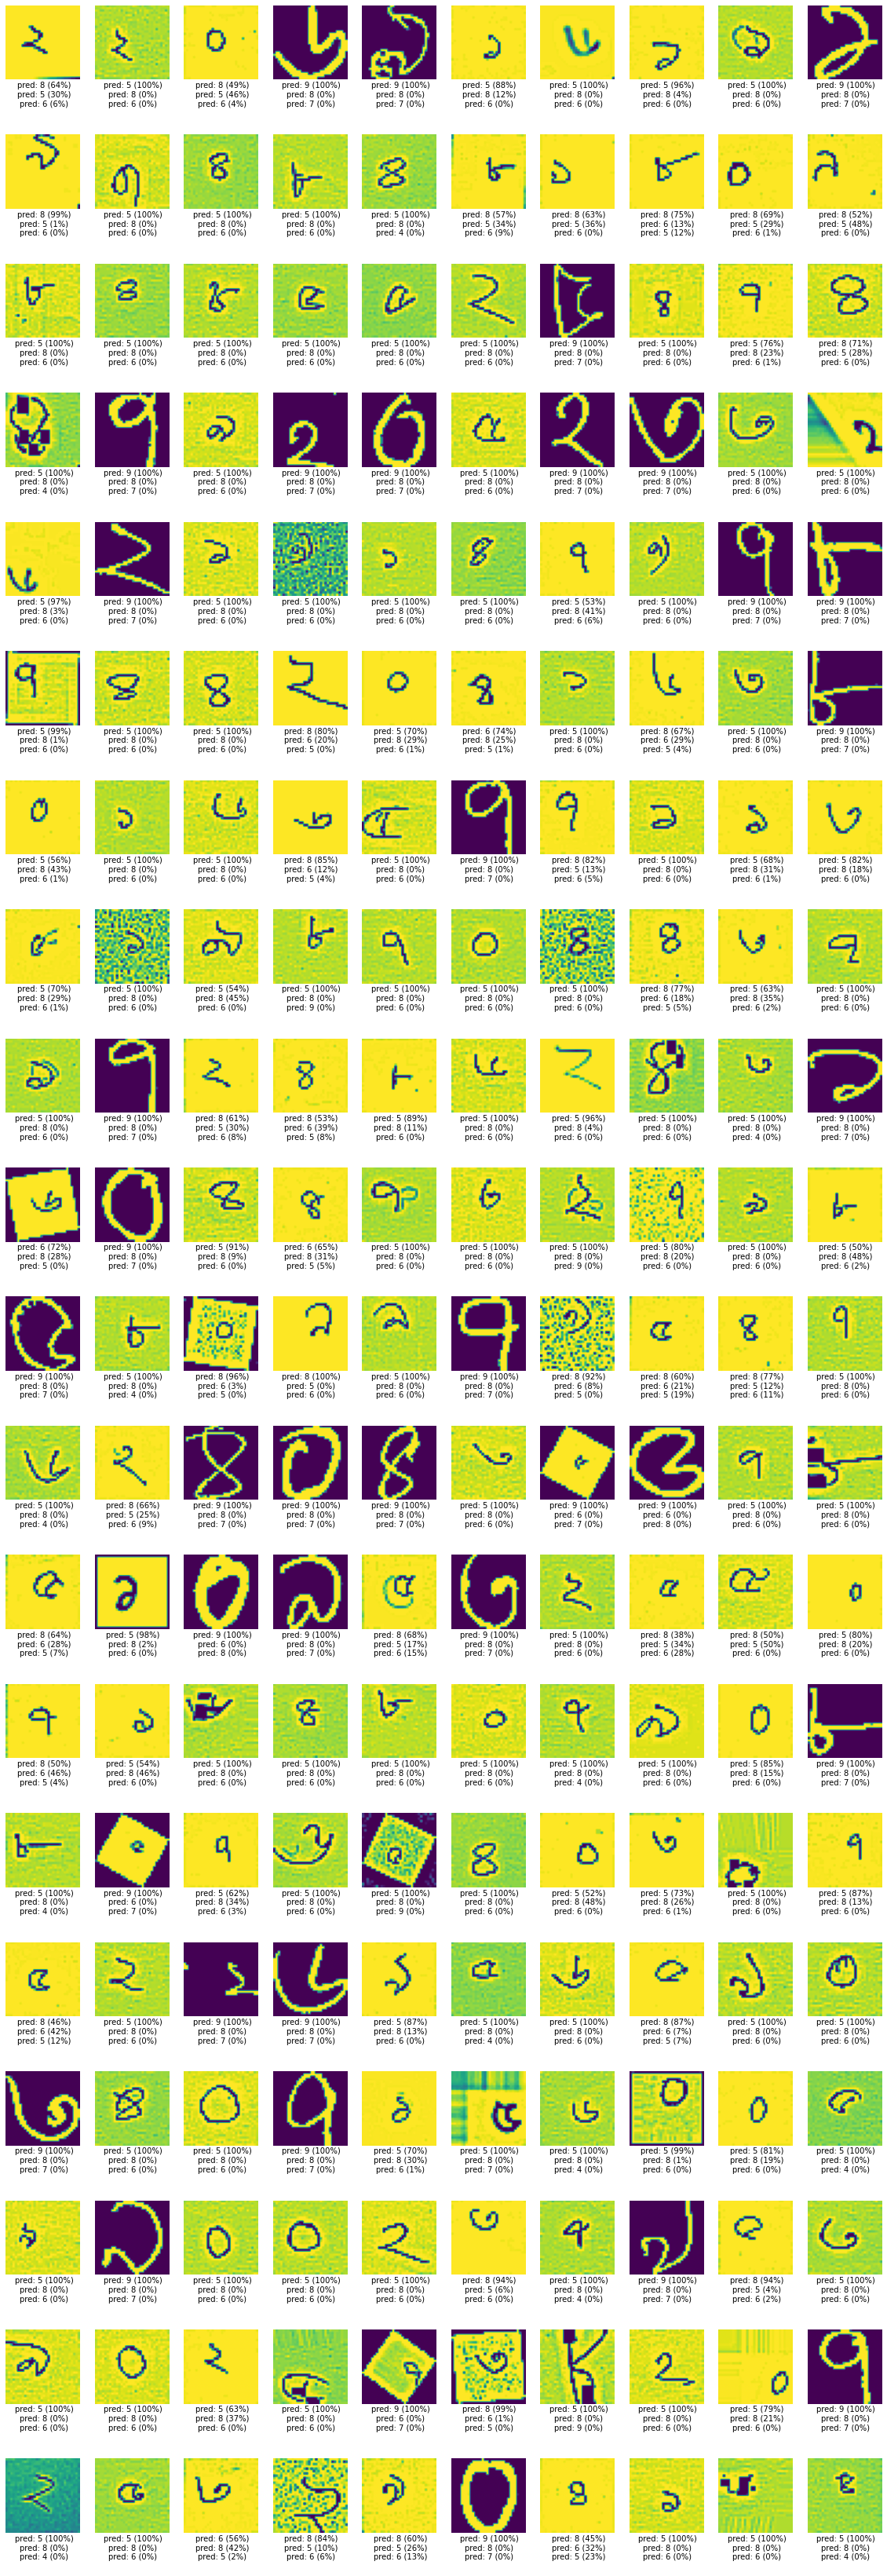

In [276]:
X_tshow_all=X_test_all
imshow_group(X=X_tshow_all[ind],y=None,y_pred=predictions_prob[ind], phase='prediction')
labels=[np.argmax(pred) for pred in predictions_prob]

In [277]:

labels=[np.argmax(pred) for pred in predictions_prob]

In [278]:
keys=[get_key(path) for path in paths_test_all ]

In [279]:
create_submission(predictions=labels,keys=keys,path='cnnsubmission32_final22.csv')

In [280]:
prediction = pd.read_csv('cnnsubmission32_final.csv')
prediction.head(100)

,key,label
0,a00000.png,6
1,a00001.png,8
2,a00002.png,8
3,a00003.png,6
4,a00004.png,8
...,...,...
95,a00095.png,8
96,a00096.png,8
97,a00097.png,8
98,a00098.png,6
